In [1]:
# 모듈 로딩 --------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import Sequential              # 모델 객체
from tensorflow.keras.layers import Dense           # 레이어 객체
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np


### [1] 데이터 로딩

In [2]:
# 학습용, 테스트용 = 8 : 2
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
X_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

#### [1-1] 전처리
---
- 특성(Feature) 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler()

In [8]:
scaler.mean_ , scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [9]:
X_train_scaled=scaler.transform(X_train)

### [2] NN Nodel 실습
---
    * (1) 모델 구성
    * (2) 모델 생성
    * (3) 학습
    * (4) 평가
    * (5) 테스트

#### [2-1] 모델 구상
- 입력 데이터 => 13개 Features
- 출력 데이터 => 1개 집값
- 학습   방법 => 회귀 or 분류
    - 13개 Features
 * Dense Layer : node=1, af=linear, input_shape=(13, )

In [10]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential(name='BostonNNM')

In [30]:
# # Layer 추가하기
# model.add(Input(shape=(13,), name='input'))
# model.add(Dense(30, activation='relu', name='hidden-1'))
# model.add(Dense(30, activation='relu', name='hidden-1', imput-shape=(13, )))

# # 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
# model.add ( Dropout(0,5))
# model.add(Dense(10, activation='relu', name='hidden-2'))

# # 회귀 => 출력층
# model.add(Dense(1, activation='linear', name='output'))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3133324922.py, line 4)

In [12]:
# Layer 추가하기
# l1=Input(shape=(13,), name='input'))
l1=Dense(30, activation='relu', input_shape=(13,))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
# model.add ( Dropout(0,5))
l2=Dense(10, activation='relu', name='hidden-2')

# 회귀 => 출력층
l3=Dense(1, activation='linear', name='output')

In [13]:
model.add(l1)
model.add(l2)
model.add(l3)
# model.add(l4)

In [14]:
# 모델 구성 확인   => summary()
model.summary()

Model: "BostonNNM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 hidden-2 (Dense)            (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
---
-Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 => loss
    * W, B 최적화 방식 설정 => optimizer
    * 모델의 성능 측정 항목 설정 => metrics
---
- 오차/로스 계산함수
    * 회귀 -> mae, mse, rmse
    * 분류 -> crossentropy 
       => 이진분류 : binary_crossentropy
          다중분류 : categorical_crossentropy  <= 타겟 One Hot 했을때
                  sparse_categorical_crossentropy <= One Hot Encoding X
---
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능
---    
- 최적화 optimizer param
    * 기본 : rmsprop
    * adam, momonent, ... 최적화 클래스 이름 문자열 입력
---    
- 성능 평가 metrics param
    * 기본 : loss
    * 클래스 이름 문자열 입력

In [15]:
model.compile(loss='mse', optimizer='adam', metrics='mae')

#### [2-3] 학습
---
- fit()메서드
    * 파라미터
    * 반환값 => History 객체

- epochs=1         : 처음~끝까지 학습 횟수
- batch_size=32    : 학습량 크기
- validation_split : 학습 데이터의 일부를 검증용으로 분리 0.0~1.0
- validation_data  : (테스트데이터, 테스트 타겟)
- callback         : 학습 시 발생하는 이벤트 처리 함수 등록

- History 반환값
    * 형태 : dict 형태
    * 기본 : 학습 데이터에 대한 loss 값 저장
---
- 반환값
    *loss,metrics

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss, patience=3')

In [17]:
result=model.fit(X_train, y_train, 
                 epochs=1000, 
                 batch_size=10,
                validation_data=(X_test, y_test),
                callbacks=[stopCB])

Epoch 1/1000
41/41 [==============================] - 1s 6ms/step - loss: 97.9900 - mae: 7.6331 - val_loss: 66.5708 - val_mae: 6.0715
Epoch 2/1000
41/41 [==============================] - 0s 2ms/step - loss: 65.6030 - mae: 5.8717 - val_loss: 66.0681 - val_mae: 5.8016
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 61.7971 - mae: 5.6039 - val_loss: 60.9128 - val_mae: 5.6114
Epoch 4/1000
41/41 [==============================] - 0s 3ms/step - loss: 59.4804 - mae: 5.3479 - val_loss: 60.3969 - val_mae: 5.6269
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 61.9712 - mae: 5.4337 - val_loss: 65.4970 - val_mae: 5.7556
Epoch 6/1000
41/41 [==============================] - 0s 2ms/step - loss: 59.0792 - mae: 5.4338 - val_loss: 58.6802 - val_mae: 5.5512
Epoch 7/1000
41/41 [==============================] - 0s 2ms/step - loss: 55.0124 - mae: 5.1754 - val_loss: 62.0212 - val_mae: 6.0610
Epoch 8/1000
41/41 [==============================] - 0s 2ms/s

41/41 [==============================] - 0s 2ms/step - loss: 37.3827 - mae: 4.3188 - val_loss: 44.3843 - val_mae: 4.6593
Epoch 24/1000
41/41 [==============================] - 0s 2ms/step - loss: 37.3387 - mae: 4.3943 - val_loss: 42.1649 - val_mae: 4.5807
Epoch 25/1000
41/41 [==============================] - 0s 2ms/step - loss: 36.9024 - mae: 4.3105 - val_loss: 43.0115 - val_mae: 4.6141
Epoch 26/1000
41/41 [==============================] - 0s 2ms/step - loss: 35.4702 - mae: 4.2843 - val_loss: 40.4542 - val_mae: 4.5809
Epoch 27/1000
41/41 [==============================] - 0s 2ms/step - loss: 34.6752 - mae: 4.2292 - val_loss: 40.6806 - val_mae: 4.5405
Epoch 28/1000
41/41 [==============================] - 0s 2ms/step - loss: 35.1879 - mae: 4.3146 - val_loss: 39.7294 - val_mae: 4.7223
Epoch 29/1000
41/41 [==============================] - 0s 2ms/step - loss: 33.1648 - mae: 4.2402 - val_loss: 39.2006 - val_mae: 4.5388
Epoch 30/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 26.2484 - mae: 3.8920 - val_loss: 34.5727 - val_mae: 4.3865
Epoch 47/1000
41/41 [==============================] - 0s 2ms/step - loss: 27.9604 - mae: 4.0084 - val_loss: 34.6063 - val_mae: 4.4285
Epoch 48/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.9362 - mae: 3.7687 - val_loss: 37.4963 - val_mae: 4.4687
Epoch 49/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.6558 - mae: 3.7131 - val_loss: 35.6443 - val_mae: 4.4551
Epoch 50/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.5634 - mae: 3.7232 - val_loss: 38.2767 - val_mae: 4.5480
Epoch 51/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2616 - mae: 3.7627 - val_loss: 35.3780 - val_mae: 4.5879
Epoch 52/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.9443 - mae: 3.8302 - val_loss: 36.2519 - val_mae: 4.4294
Epoch 53/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 20.0259 - mae: 3.3418 - val_loss: 37.6493 - val_mae: 4.5697
Epoch 69/1000
41/41 [==============================] - 0s 2ms/step - loss: 18.3904 - mae: 3.3107 - val_loss: 35.7170 - val_mae: 4.2588
Epoch 70/1000
41/41 [==============================] - 0s 2ms/step - loss: 19.5499 - mae: 3.3083 - val_loss: 37.0431 - val_mae: 4.3380
Epoch 71/1000
41/41 [==============================] - 0s 2ms/step - loss: 20.4905 - mae: 3.3866 - val_loss: 36.4626 - val_mae: 4.5033
Epoch 72/1000
41/41 [==============================] - 0s 2ms/step - loss: 19.8346 - mae: 3.3577 - val_loss: 35.0059 - val_mae: 4.1875
Epoch 73/1000
41/41 [==============================] - 0s 2ms/step - loss: 19.5939 - mae: 3.3207 - val_loss: 36.2536 - val_mae: 4.6105
Epoch 74/1000
41/41 [==============================] - 0s 2ms/step - loss: 18.5410 - mae: 3.2643 - val_loss: 33.9144 - val_mae: 4.1995
Epoch 75/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 18.9544 - mae: 3.2463 - val_loss: 33.4823 - val_mae: 4.1322
Epoch 92/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.9985 - mae: 3.0345 - val_loss: 33.7785 - val_mae: 3.9772
Epoch 93/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.6664 - mae: 2.9771 - val_loss: 34.2934 - val_mae: 3.9671
Epoch 94/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.0464 - mae: 2.9473 - val_loss: 34.3147 - val_mae: 4.0298
Epoch 95/1000
41/41 [==============================] - 0s 2ms/step - loss: 18.6118 - mae: 3.2123 - val_loss: 34.1463 - val_mae: 4.0109
Epoch 96/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.1336 - mae: 2.9501 - val_loss: 44.3519 - val_mae: 4.7060
Epoch 97/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.4101 - mae: 3.0136 - val_loss: 34.8220 - val_mae: 3.9901
Epoch 98/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 15.3562 - mae: 2.9468 - val_loss: 39.1676 - val_mae: 4.3726
Epoch 114/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.3770 - mae: 2.8610 - val_loss: 35.7450 - val_mae: 3.9950
Epoch 115/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.7575 - mae: 2.8998 - val_loss: 33.3365 - val_mae: 3.9262
Epoch 116/1000
41/41 [==============================] - 0s 2ms/step - loss: 17.3599 - mae: 3.1190 - val_loss: 37.2521 - val_mae: 4.2004
Epoch 117/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.2620 - mae: 2.8792 - val_loss: 34.7541 - val_mae: 3.9987
Epoch 118/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.0693 - mae: 2.9068 - val_loss: 37.1374 - val_mae: 4.2011
Epoch 119/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.6640 - mae: 3.0579 - val_loss: 40.5242 - val_mae: 4.4698
Epoch 120/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 15.1366 - mae: 2.8800 - val_loss: 35.9913 - val_mae: 4.0779
Epoch 137/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.9038 - mae: 2.8891 - val_loss: 35.3375 - val_mae: 4.0630
Epoch 138/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.1909 - mae: 2.8312 - val_loss: 36.6621 - val_mae: 4.0790
Epoch 139/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.4554 - mae: 2.8511 - val_loss: 34.7327 - val_mae: 4.0329
Epoch 140/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.3970 - mae: 2.8990 - val_loss: 33.8001 - val_mae: 3.9724
Epoch 141/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.5724 - mae: 2.8578 - val_loss: 33.3713 - val_mae: 3.9290
Epoch 142/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.9534 - mae: 2.8328 - val_loss: 36.6300 - val_mae: 4.1258
Epoch 143/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 14.2581 - mae: 2.8355 - val_loss: 34.0228 - val_mae: 3.9740
Epoch 159/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.8313 - mae: 2.7698 - val_loss: 33.9468 - val_mae: 4.0140
Epoch 160/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.6249 - mae: 3.0250 - val_loss: 36.8362 - val_mae: 4.1272
Epoch 161/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.3148 - mae: 3.0201 - val_loss: 36.0764 - val_mae: 4.2032
Epoch 162/1000
41/41 [==============================] - 0s 2ms/step - loss: 19.1491 - mae: 3.1224 - val_loss: 35.1336 - val_mae: 3.9986
Epoch 163/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.4789 - mae: 2.8427 - val_loss: 34.9125 - val_mae: 4.1799
Epoch 164/1000
41/41 [==============================] - 0s 2ms/step - loss: 16.4555 - mae: 2.9589 - val_loss: 34.0844 - val_mae: 3.8942
Epoch 165/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 14.2643 - mae: 2.8093 - val_loss: 34.5172 - val_mae: 3.9436
Epoch 182/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.3047 - mae: 2.6795 - val_loss: 35.5297 - val_mae: 4.0696
Epoch 183/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.9302 - mae: 3.0190 - val_loss: 34.0974 - val_mae: 3.9608
Epoch 184/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.0168 - mae: 2.8256 - val_loss: 34.9028 - val_mae: 3.9684
Epoch 185/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.4117 - mae: 2.7354 - val_loss: 33.7785 - val_mae: 3.9437
Epoch 186/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.3383 - mae: 2.7165 - val_loss: 35.3291 - val_mae: 3.9571
Epoch 187/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.6636 - mae: 2.6985 - val_loss: 35.1237 - val_mae: 4.0235
Epoch 188/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 15.7258 - mae: 2.9009 - val_loss: 38.2889 - val_mae: 4.2990
Epoch 204/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.3533 - mae: 2.6636 - val_loss: 33.1604 - val_mae: 3.9023
Epoch 205/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.0958 - mae: 2.7114 - val_loss: 32.9934 - val_mae: 3.8791
Epoch 206/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.0616 - mae: 2.6474 - val_loss: 33.1880 - val_mae: 3.9267
Epoch 207/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.7667 - mae: 2.6631 - val_loss: 34.0060 - val_mae: 3.9903
Epoch 208/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.0617 - mae: 2.6530 - val_loss: 33.2745 - val_mae: 3.9287
Epoch 209/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.8026 - mae: 2.6615 - val_loss: 34.1508 - val_mae: 3.9845
Epoch 210/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 13.4388 - mae: 2.7022 - val_loss: 33.0351 - val_mae: 3.8646
Epoch 227/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.8439 - mae: 2.5923 - val_loss: 32.9950 - val_mae: 3.9115
Epoch 228/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.2230 - mae: 2.6853 - val_loss: 32.4790 - val_mae: 3.8307
Epoch 229/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.2888 - mae: 2.7820 - val_loss: 34.1237 - val_mae: 3.9832
Epoch 230/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.2718 - mae: 2.7074 - val_loss: 34.6950 - val_mae: 3.9942
Epoch 231/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.6443 - mae: 2.6392 - val_loss: 33.0288 - val_mae: 3.8805
Epoch 232/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.4622 - mae: 2.5779 - val_loss: 40.2100 - val_mae: 4.3645
Epoch 233/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 15.8465 - mae: 2.9666 - val_loss: 37.8197 - val_mae: 4.2989
Epoch 249/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.9395 - mae: 2.9108 - val_loss: 33.1204 - val_mae: 3.8403
Epoch 250/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.0416 - mae: 2.6310 - val_loss: 34.3008 - val_mae: 3.8980
Epoch 251/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.1770 - mae: 2.6957 - val_loss: 32.0359 - val_mae: 3.7946
Epoch 252/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.7307 - mae: 2.7621 - val_loss: 34.2094 - val_mae: 4.0610
Epoch 253/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.3052 - mae: 2.6677 - val_loss: 32.3751 - val_mae: 3.8353
Epoch 254/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.7532 - mae: 2.7100 - val_loss: 35.2291 - val_mae: 3.9675
Epoch 255/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 12.9794 - mae: 2.7039 - val_loss: 45.8069 - val_mae: 4.5848
Epoch 272/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.7073 - mae: 2.7223 - val_loss: 32.9118 - val_mae: 3.7673
Epoch 273/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.7055 - mae: 2.6599 - val_loss: 33.7875 - val_mae: 3.8746
Epoch 274/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.3524 - mae: 2.6613 - val_loss: 34.3945 - val_mae: 3.8343
Epoch 275/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.8812 - mae: 2.5775 - val_loss: 30.5994 - val_mae: 3.7326
Epoch 276/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.0495 - mae: 2.5793 - val_loss: 37.8676 - val_mae: 4.1706
Epoch 277/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.6344 - mae: 2.7069 - val_loss: 32.2692 - val_mae: 3.7505
Epoch 278/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 12.5404 - mae: 2.6947 - val_loss: 36.4125 - val_mae: 4.1367
Epoch 294/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.3280 - mae: 2.8184 - val_loss: 29.7976 - val_mae: 3.6951
Epoch 295/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2792 - mae: 2.5098 - val_loss: 32.4177 - val_mae: 3.8111
Epoch 296/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.1961 - mae: 2.5789 - val_loss: 35.3592 - val_mae: 4.0937
Epoch 297/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.5906 - mae: 2.7550 - val_loss: 34.3514 - val_mae: 3.8139
Epoch 298/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.5658 - mae: 2.6138 - val_loss: 37.4229 - val_mae: 4.2110
Epoch 299/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.9151 - mae: 2.6360 - val_loss: 33.5113 - val_mae: 3.8434
Epoch 300/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 12.3100 - mae: 2.6634 - val_loss: 37.7264 - val_mae: 4.2212
Epoch 317/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.9721 - mae: 2.5756 - val_loss: 32.7434 - val_mae: 3.7509
Epoch 318/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.0195 - mae: 2.5797 - val_loss: 33.3569 - val_mae: 3.8671
Epoch 319/1000
41/41 [==============================] - 0s 2ms/step - loss: 13.5045 - mae: 2.6741 - val_loss: 28.7480 - val_mae: 3.6281
Epoch 320/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.1206 - mae: 2.6905 - val_loss: 31.9457 - val_mae: 3.7714
Epoch 321/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.3425 - mae: 2.5243 - val_loss: 36.2462 - val_mae: 4.0264
Epoch 322/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.9530 - mae: 2.5736 - val_loss: 34.2066 - val_mae: 3.8032
Epoch 323/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 13.0434 - mae: 2.6547 - val_loss: 33.4110 - val_mae: 3.7836
Epoch 339/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.3223 - mae: 2.5630 - val_loss: 31.1457 - val_mae: 3.7047
Epoch 340/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.4560 - mae: 2.4695 - val_loss: 33.4987 - val_mae: 3.7823
Epoch 341/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.9254 - mae: 2.5169 - val_loss: 33.5152 - val_mae: 3.7604
Epoch 342/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.9021 - mae: 2.5334 - val_loss: 32.8292 - val_mae: 3.7603
Epoch 343/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.0865 - mae: 2.4723 - val_loss: 32.6574 - val_mae: 3.7335
Epoch 344/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.9506 - mae: 2.5863 - val_loss: 32.9199 - val_mae: 3.9440
Epoch 345/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 12.6521 - mae: 2.6076 - val_loss: 31.1367 - val_mae: 3.7707
Epoch 362/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.5373 - mae: 2.5323 - val_loss: 40.2089 - val_mae: 4.3533
Epoch 363/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.4176 - mae: 2.7978 - val_loss: 33.8795 - val_mae: 3.7352
Epoch 364/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.7330 - mae: 2.8077 - val_loss: 36.1336 - val_mae: 4.2115
Epoch 365/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.9519 - mae: 2.4622 - val_loss: 33.7063 - val_mae: 3.8887
Epoch 366/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.0761 - mae: 2.4892 - val_loss: 33.0849 - val_mae: 3.7751
Epoch 367/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.9314 - mae: 2.6290 - val_loss: 31.2404 - val_mae: 3.6920
Epoch 368/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 10.5006 - mae: 2.4080 - val_loss: 34.4085 - val_mae: 3.8387
Epoch 384/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.6171 - mae: 2.4424 - val_loss: 34.2109 - val_mae: 3.8681
Epoch 385/1000
41/41 [==============================] - 0s 2ms/step - loss: 15.3362 - mae: 2.9272 - val_loss: 33.5179 - val_mae: 3.7572
Epoch 386/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.5305 - mae: 2.5258 - val_loss: 32.6718 - val_mae: 3.7368
Epoch 387/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.6542 - mae: 2.5924 - val_loss: 31.5579 - val_mae: 3.6912
Epoch 388/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.5229 - mae: 2.4503 - val_loss: 33.1063 - val_mae: 3.9259
Epoch 389/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.5235 - mae: 2.4913 - val_loss: 30.9555 - val_mae: 3.6673
Epoch 390/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 10.7048 - mae: 2.4410 - val_loss: 31.7031 - val_mae: 3.6860
Epoch 407/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.0121 - mae: 2.5337 - val_loss: 28.5434 - val_mae: 3.5521
Epoch 408/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.8447 - mae: 2.4458 - val_loss: 29.8506 - val_mae: 3.5953
Epoch 409/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2661 - mae: 2.3812 - val_loss: 29.2401 - val_mae: 3.5938
Epoch 410/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.1280 - mae: 2.4774 - val_loss: 27.8613 - val_mae: 3.5458
Epoch 411/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.0846 - mae: 2.4529 - val_loss: 32.0253 - val_mae: 3.7259
Epoch 412/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2812 - mae: 2.4825 - val_loss: 33.3883 - val_mae: 3.8969
Epoch 413/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 11.2660 - mae: 2.4365 - val_loss: 31.9050 - val_mae: 3.6834
Epoch 429/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.5577 - mae: 2.4078 - val_loss: 33.3684 - val_mae: 4.0313
Epoch 430/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.0994 - mae: 2.4166 - val_loss: 33.0149 - val_mae: 3.7082
Epoch 431/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.3498 - mae: 2.3829 - val_loss: 30.6249 - val_mae: 3.6991
Epoch 432/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.5100 - mae: 2.3792 - val_loss: 31.1344 - val_mae: 3.6689
Epoch 433/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2503 - mae: 2.3966 - val_loss: 31.9414 - val_mae: 3.7167
Epoch 434/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2650 - mae: 2.4835 - val_loss: 34.3263 - val_mae: 3.6919
Epoch 435/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 10.1322 - mae: 2.3645 - val_loss: 30.7289 - val_mae: 3.5717
Epoch 452/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.0646 - mae: 2.3809 - val_loss: 31.8895 - val_mae: 3.6311
Epoch 453/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.3033 - mae: 2.4481 - val_loss: 34.2568 - val_mae: 3.7536
Epoch 454/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.4145 - mae: 2.5943 - val_loss: 32.2698 - val_mae: 3.7780
Epoch 455/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.9722 - mae: 2.3568 - val_loss: 27.5038 - val_mae: 3.4875
Epoch 456/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.1346 - mae: 2.4963 - val_loss: 28.9391 - val_mae: 3.5334
Epoch 457/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.8516 - mae: 2.5442 - val_loss: 29.2304 - val_mae: 3.6373
Epoch 458/1000
41/41 [==============================] - 0s 2ms/s

41/41 [==============================] - 0s 2ms/step - loss: 10.5463 - mae: 2.3638 - val_loss: 32.9436 - val_mae: 3.9103
Epoch 474/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.1632 - mae: 2.4241 - val_loss: 31.0279 - val_mae: 3.6510
Epoch 475/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.4556 - mae: 2.3935 - val_loss: 30.2482 - val_mae: 3.6012
Epoch 476/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.9508 - mae: 2.4435 - val_loss: 33.4996 - val_mae: 3.6813
Epoch 477/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.6900 - mae: 2.4576 - val_loss: 31.7594 - val_mae: 3.6909
Epoch 478/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.1154 - mae: 2.3979 - val_loss: 33.7674 - val_mae: 3.7208
Epoch 479/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2020 - mae: 2.3714 - val_loss: 28.1397 - val_mae: 3.4674
Epoch 480/1000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 10.8054 - mae: 2.4506 - val_loss: 30.3029 - val_mae: 3.5105
Epoch 497/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.0900 - mae: 2.3799 - val_loss: 28.6526 - val_mae: 3.4883
Epoch 498/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2553 - mae: 2.4078 - val_loss: 34.3170 - val_mae: 3.9501
Epoch 499/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.9122 - mae: 2.4057 - val_loss: 29.9572 - val_mae: 3.5723
Epoch 500/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.0868 - mae: 2.5638 - val_loss: 28.2081 - val_mae: 3.4573
Epoch 501/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.6724 - mae: 2.3763 - val_loss: 30.0801 - val_mae: 3.5317
Epoch 502/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.9604 - mae: 2.3246 - val_loss: 30.2976 - val_mae: 3.5777
Epoch 503/1000
41/41 [==============================] - 0s 2ms/s

41/41 [==============================] - 0s 2ms/step - loss: 9.3884 - mae: 2.2822 - val_loss: 29.7774 - val_mae: 3.5257
Epoch 519/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.3546 - mae: 2.2756 - val_loss: 33.4421 - val_mae: 3.6233
Epoch 520/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.7623 - mae: 2.5470 - val_loss: 32.7172 - val_mae: 3.6327
Epoch 521/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2030 - mae: 2.4341 - val_loss: 29.5219 - val_mae: 3.5628
Epoch 522/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.1340 - mae: 2.3041 - val_loss: 30.1523 - val_mae: 3.5676
Epoch 523/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.2597 - mae: 2.4668 - val_loss: 28.5638 - val_mae: 3.4725
Epoch 524/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.6528 - mae: 2.3545 - val_loss: 29.8479 - val_mae: 3.5123
Epoch 525/1000
41/41 [==============================] - 0s 2ms/st

41/41 [==============================] - 0s 2ms/step - loss: 9.6879 - mae: 2.3429 - val_loss: 32.8408 - val_mae: 3.7022
Epoch 542/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2697 - mae: 2.4055 - val_loss: 30.0031 - val_mae: 3.5036
Epoch 543/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2265 - mae: 2.3530 - val_loss: 35.1876 - val_mae: 3.7738
Epoch 544/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.7748 - mae: 2.4261 - val_loss: 29.9340 - val_mae: 3.4881
Epoch 545/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5247 - mae: 2.2961 - val_loss: 40.0428 - val_mae: 4.2226
Epoch 546/1000
41/41 [==============================] - 0s 2ms/step - loss: 14.7787 - mae: 2.7765 - val_loss: 31.8397 - val_mae: 3.7126
Epoch 547/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.0514 - mae: 2.3576 - val_loss: 29.8370 - val_mae: 3.5244
Epoch 548/1000
41/41 [==============================] - 0s 2ms/st

41/41 [==============================] - 0s 2ms/step - loss: 9.9162 - mae: 2.3333 - val_loss: 28.0014 - val_mae: 3.4383
Epoch 564/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.9357 - mae: 2.3570 - val_loss: 32.5287 - val_mae: 3.7585
Epoch 565/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.7031 - mae: 2.3096 - val_loss: 31.3831 - val_mae: 3.7036
Epoch 566/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2411 - mae: 2.3782 - val_loss: 28.5758 - val_mae: 3.4561
Epoch 567/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.4515 - mae: 2.2442 - val_loss: 28.0577 - val_mae: 3.4660
Epoch 568/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.4763 - mae: 2.3931 - val_loss: 29.0960 - val_mae: 3.4784
Epoch 569/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.2029 - mae: 2.3280 - val_loss: 30.4781 - val_mae: 3.6061
Epoch 570/1000
41/41 [==============================] - 0s 2ms/step

41/41 [==============================] - 0s 2ms/step - loss: 10.0090 - mae: 2.3421 - val_loss: 30.9893 - val_mae: 3.5379
Epoch 587/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.0699 - mae: 2.3614 - val_loss: 30.7210 - val_mae: 3.5001
Epoch 588/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.2220 - mae: 2.2710 - val_loss: 31.0349 - val_mae: 3.6134
Epoch 589/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5267 - mae: 2.2623 - val_loss: 31.3546 - val_mae: 3.4930
Epoch 590/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.6210 - mae: 2.2470 - val_loss: 31.6651 - val_mae: 3.7568
Epoch 591/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.7761 - mae: 2.3736 - val_loss: 27.6282 - val_mae: 3.4356
Epoch 592/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.5267 - mae: 2.3845 - val_loss: 30.2536 - val_mae: 3.4216
Epoch 593/1000
41/41 [==============================] - 0s 2ms/ste

41/41 [==============================] - 0s 2ms/step - loss: 9.4771 - mae: 2.2580 - val_loss: 29.3018 - val_mae: 3.4384
Epoch 609/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.9479 - mae: 2.3427 - val_loss: 31.7943 - val_mae: 3.5252
Epoch 610/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.6611 - mae: 2.3867 - val_loss: 31.3974 - val_mae: 3.6467
Epoch 611/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.1893 - mae: 2.5157 - val_loss: 28.3899 - val_mae: 3.4637
Epoch 612/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.7133 - mae: 2.2705 - val_loss: 30.9635 - val_mae: 3.5234
Epoch 613/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.8520 - mae: 2.3201 - val_loss: 29.0853 - val_mae: 3.4165
Epoch 614/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.8633 - mae: 2.3218 - val_loss: 28.5159 - val_mae: 3.4877
Epoch 615/1000
41/41 [==============================] - 0s 2ms/step 

41/41 [==============================] - 0s 2ms/step - loss: 11.0762 - mae: 2.4322 - val_loss: 28.2778 - val_mae: 3.4630
Epoch 632/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.9784 - mae: 2.4286 - val_loss: 26.8848 - val_mae: 3.3997
Epoch 633/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.0770 - mae: 2.4519 - val_loss: 27.4584 - val_mae: 3.4086
Epoch 634/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.6952 - mae: 2.3200 - val_loss: 29.4004 - val_mae: 3.3993
Epoch 635/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9535 - mae: 2.2108 - val_loss: 29.0127 - val_mae: 3.4657
Epoch 636/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5671 - mae: 2.3019 - val_loss: 26.7583 - val_mae: 3.4620
Epoch 637/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.1292 - mae: 2.2893 - val_loss: 31.5750 - val_mae: 3.5138
Epoch 638/1000
41/41 [==============================] - 0s 2ms/ste

41/41 [==============================] - 0s 2ms/step - loss: 9.8866 - mae: 2.3700 - val_loss: 30.3632 - val_mae: 3.4303
Epoch 654/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.2452 - mae: 2.2327 - val_loss: 29.9601 - val_mae: 3.4404
Epoch 655/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.6952 - mae: 2.1961 - val_loss: 28.1779 - val_mae: 3.4098
Epoch 656/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.0316 - mae: 2.3748 - val_loss: 34.7485 - val_mae: 3.7514
Epoch 657/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.6305 - mae: 2.2961 - val_loss: 28.8011 - val_mae: 3.3795
Epoch 658/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9603 - mae: 2.2103 - val_loss: 30.0448 - val_mae: 3.4591
Epoch 659/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.6075 - mae: 2.3194 - val_loss: 31.0878 - val_mae: 3.5527
Epoch 660/1000
41/41 [==============================] - 0s 2ms/step 

41/41 [==============================] - 0s 2ms/step - loss: 15.8825 - mae: 2.8999 - val_loss: 27.3961 - val_mae: 3.3361
Epoch 677/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9550 - mae: 2.2195 - val_loss: 33.3906 - val_mae: 3.4630
Epoch 678/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.4158 - mae: 2.2464 - val_loss: 31.6514 - val_mae: 3.4747
Epoch 679/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.3190 - mae: 2.2983 - val_loss: 30.2034 - val_mae: 3.4669
Epoch 680/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.8301 - mae: 2.2297 - val_loss: 28.5307 - val_mae: 3.3382
Epoch 681/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.2752 - mae: 2.1432 - val_loss: 30.2293 - val_mae: 3.3464
Epoch 682/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.5326 - mae: 2.1288 - val_loss: 31.5737 - val_mae: 3.6738
Epoch 683/1000
41/41 [==============================] - 0s 2ms/step -

41/41 [==============================] - 0s 2ms/step - loss: 8.4519 - mae: 2.1750 - val_loss: 30.5240 - val_mae: 3.4354
Epoch 699/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.3407 - mae: 2.4240 - val_loss: 29.0058 - val_mae: 3.4930
Epoch 700/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5524 - mae: 2.2554 - val_loss: 30.6902 - val_mae: 3.4200
Epoch 701/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9337 - mae: 2.1989 - val_loss: 26.3876 - val_mae: 3.3455
Epoch 702/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5343 - mae: 2.2957 - val_loss: 30.5363 - val_mae: 3.5077
Epoch 703/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.2055 - mae: 2.2751 - val_loss: 26.6699 - val_mae: 3.3210
Epoch 704/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.9983 - mae: 2.3766 - val_loss: 37.7554 - val_mae: 4.1807
Epoch 705/1000
41/41 [==============================] - 0s 2ms/step -

41/41 [==============================] - 0s 2ms/step - loss: 8.2759 - mae: 2.1119 - val_loss: 29.8924 - val_mae: 3.3356
Epoch 722/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.5384 - mae: 2.1714 - val_loss: 30.9450 - val_mae: 3.3844
Epoch 723/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9585 - mae: 2.1958 - val_loss: 29.9153 - val_mae: 3.3951
Epoch 724/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.2019 - mae: 2.2593 - val_loss: 28.1261 - val_mae: 3.4250
Epoch 725/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.8802 - mae: 2.1834 - val_loss: 32.8396 - val_mae: 3.5028
Epoch 726/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.5398 - mae: 2.2745 - val_loss: 28.6245 - val_mae: 3.3802
Epoch 727/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.3590 - mae: 2.1363 - val_loss: 33.3470 - val_mae: 3.4239
Epoch 728/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 9.3795 - mae: 2.2435 - val_loss: 28.5343 - val_mae: 3.3516
Epoch 744/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9799 - mae: 2.1784 - val_loss: 29.4635 - val_mae: 3.3168
Epoch 745/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.6956 - mae: 2.2209 - val_loss: 27.9814 - val_mae: 3.3307
Epoch 746/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.7576 - mae: 2.1656 - val_loss: 29.2055 - val_mae: 3.3597
Epoch 747/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.6701 - mae: 2.1975 - val_loss: 30.9910 - val_mae: 3.5201
Epoch 748/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.1795 - mae: 2.2004 - val_loss: 28.4567 - val_mae: 3.3401
Epoch 749/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.5549 - mae: 2.1581 - val_loss: 31.1103 - val_mae: 3.4314
Epoch 750/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 9.6618 - mae: 2.3118 - val_loss: 31.4891 - val_mae: 3.6628
Epoch 767/1000
41/41 [==============================] - 0s 2ms/step - loss: 12.3828 - mae: 2.5078 - val_loss: 38.4284 - val_mae: 3.9076
Epoch 768/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.6922 - mae: 2.3669 - val_loss: 27.2883 - val_mae: 3.2740
Epoch 769/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.7826 - mae: 2.1903 - val_loss: 28.4949 - val_mae: 3.3129
Epoch 770/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.4559 - mae: 2.1929 - val_loss: 28.4491 - val_mae: 3.4628
Epoch 771/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1495 - mae: 2.1375 - val_loss: 28.1998 - val_mae: 3.2954
Epoch 772/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.8767 - mae: 2.3443 - val_loss: 26.7665 - val_mae: 3.2830
Epoch 773/1000
41/41 [==============================] - 0s 2ms/step 

41/41 [==============================] - 0s 2ms/step - loss: 8.1049 - mae: 2.1165 - val_loss: 27.3202 - val_mae: 3.2796
Epoch 789/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.4665 - mae: 2.1349 - val_loss: 31.1218 - val_mae: 3.3601
Epoch 790/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.7184 - mae: 2.1828 - val_loss: 30.9201 - val_mae: 3.2941
Epoch 791/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1851 - mae: 2.1403 - val_loss: 28.0654 - val_mae: 3.2525
Epoch 792/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.8650 - mae: 2.1229 - val_loss: 31.8579 - val_mae: 3.3725
Epoch 793/1000
41/41 [==============================] - 0s 2ms/step - loss: 10.1460 - mae: 2.2241 - val_loss: 32.6715 - val_mae: 3.7261
Epoch 794/1000
41/41 [==============================] - 0s 2ms/step - loss: 11.6611 - mae: 2.4613 - val_loss: 28.7664 - val_mae: 3.3962
Epoch 795/1000
41/41 [==============================] - 0s 2ms/step 

41/41 [==============================] - 0s 2ms/step - loss: 9.1562 - mae: 2.2146 - val_loss: 29.3441 - val_mae: 3.5139
Epoch 812/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1349 - mae: 2.1282 - val_loss: 29.2155 - val_mae: 3.3319
Epoch 813/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.7657 - mae: 2.1790 - val_loss: 31.4055 - val_mae: 3.2636
Epoch 814/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1376 - mae: 2.1201 - val_loss: 27.4281 - val_mae: 3.2797
Epoch 815/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.3991 - mae: 2.1340 - val_loss: 29.5270 - val_mae: 3.3213
Epoch 816/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.3279 - mae: 2.1353 - val_loss: 27.3033 - val_mae: 3.2469
Epoch 817/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7951 - mae: 2.0511 - val_loss: 26.4789 - val_mae: 3.3247
Epoch 818/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 9.1491 - mae: 2.2149 - val_loss: 28.0387 - val_mae: 3.2885
Epoch 834/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.2129 - mae: 2.2306 - val_loss: 28.2078 - val_mae: 3.2027
Epoch 835/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7905 - mae: 2.0575 - val_loss: 29.9402 - val_mae: 3.4189
Epoch 836/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.0034 - mae: 2.0592 - val_loss: 31.0468 - val_mae: 3.2879
Epoch 837/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.3858 - mae: 2.1610 - val_loss: 28.7700 - val_mae: 3.2664
Epoch 838/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9663 - mae: 2.2291 - val_loss: 28.2359 - val_mae: 3.2284
Epoch 839/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.0719 - mae: 2.1173 - val_loss: 30.5524 - val_mae: 3.2897
Epoch 840/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.9556 - mae: 2.0682 - val_loss: 28.3073 - val_mae: 3.1870
Epoch 857/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.6480 - mae: 2.0785 - val_loss: 29.2297 - val_mae: 3.3074
Epoch 858/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.3556 - mae: 2.0112 - val_loss: 28.2080 - val_mae: 3.2743
Epoch 859/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.8340 - mae: 2.0828 - val_loss: 29.8913 - val_mae: 3.2941
Epoch 860/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1709 - mae: 2.0970 - val_loss: 32.0912 - val_mae: 3.2770
Epoch 861/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.9005 - mae: 2.1946 - val_loss: 28.5968 - val_mae: 3.2072
Epoch 862/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.2947 - mae: 2.1330 - val_loss: 29.4404 - val_mae: 3.4393
Epoch 863/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 8.1993 - mae: 2.1598 - val_loss: 28.6279 - val_mae: 3.4368
Epoch 879/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.8139 - mae: 2.2059 - val_loss: 27.8986 - val_mae: 3.2325
Epoch 880/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7341 - mae: 2.0693 - val_loss: 31.0057 - val_mae: 3.2781
Epoch 881/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7434 - mae: 2.0084 - val_loss: 27.4021 - val_mae: 3.2733
Epoch 882/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.6495 - mae: 2.0765 - val_loss: 29.6998 - val_mae: 3.1545
Epoch 883/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.0182 - mae: 2.1231 - val_loss: 27.5823 - val_mae: 3.3394
Epoch 884/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7158 - mae: 2.0616 - val_loss: 26.4373 - val_mae: 3.2440
Epoch 885/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 8.2611 - mae: 2.1112 - val_loss: 30.7161 - val_mae: 3.2200
Epoch 902/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.9469 - mae: 2.1190 - val_loss: 31.1322 - val_mae: 3.2449
Epoch 903/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.6067 - mae: 2.0293 - val_loss: 29.5689 - val_mae: 3.1445
Epoch 904/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1078 - mae: 2.1456 - val_loss: 29.5086 - val_mae: 3.4280
Epoch 905/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5239 - mae: 2.0057 - val_loss: 27.8423 - val_mae: 3.2022
Epoch 906/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5809 - mae: 2.0471 - val_loss: 27.1993 - val_mae: 3.2136
Epoch 907/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5572 - mae: 2.0628 - val_loss: 28.6697 - val_mae: 3.2484
Epoch 908/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 8.0714 - mae: 2.0982 - val_loss: 27.4058 - val_mae: 3.2100
Epoch 924/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.9501 - mae: 2.0927 - val_loss: 28.5573 - val_mae: 3.2074
Epoch 925/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7417 - mae: 2.0691 - val_loss: 28.2859 - val_mae: 3.1931
Epoch 926/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5267 - mae: 2.0397 - val_loss: 28.5089 - val_mae: 3.1609
Epoch 927/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.2290 - mae: 2.0403 - val_loss: 26.2843 - val_mae: 3.1645
Epoch 928/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.4091 - mae: 2.0241 - val_loss: 27.7234 - val_mae: 3.2857
Epoch 929/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.3068 - mae: 2.1015 - val_loss: 27.6876 - val_mae: 3.3206
Epoch 930/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.3084 - mae: 2.0074 - val_loss: 29.2634 - val_mae: 3.1926
Epoch 947/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.7439 - mae: 2.0487 - val_loss: 28.4519 - val_mae: 3.2429
Epoch 948/1000
41/41 [==============================] - 0s 2ms/step - loss: 6.8165 - mae: 1.9456 - val_loss: 35.1204 - val_mae: 3.7237
Epoch 949/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.2443 - mae: 2.1266 - val_loss: 29.4849 - val_mae: 3.1733
Epoch 950/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5854 - mae: 2.0415 - val_loss: 30.0964 - val_mae: 3.1925
Epoch 951/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.6406 - mae: 2.0685 - val_loss: 28.4411 - val_mae: 3.1952
Epoch 952/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.1731 - mae: 1.9587 - val_loss: 26.7752 - val_mae: 3.1699
Epoch 953/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.4678 - mae: 2.0186 - val_loss: 26.5662 - val_mae: 3.1936
Epoch 969/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.6209 - mae: 2.1220 - val_loss: 28.8913 - val_mae: 3.1729
Epoch 970/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.0867 - mae: 1.9963 - val_loss: 27.2526 - val_mae: 3.1507
Epoch 971/1000
41/41 [==============================] - 0s 2ms/step - loss: 6.7861 - mae: 1.9486 - val_loss: 29.5029 - val_mae: 3.1998
Epoch 972/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.2211 - mae: 2.0127 - val_loss: 30.1297 - val_mae: 3.2560
Epoch 973/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.5318 - mae: 2.1362 - val_loss: 28.0944 - val_mae: 3.2041
Epoch 974/1000
41/41 [==============================] - 0s 2ms/step - loss: 9.3109 - mae: 2.2002 - val_loss: 30.3635 - val_mae: 3.3542
Epoch 975/1000
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.0556 - mae: 1.9683 - val_loss: 28.5395 - val_mae: 3.1622
Epoch 992/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.2344 - mae: 1.9768 - val_loss: 26.6586 - val_mae: 3.2593
Epoch 993/1000
41/41 [==============================] - 0s 2ms/step - loss: 7.5121 - mae: 2.0472 - val_loss: 27.7113 - val_mae: 3.1410
Epoch 994/1000
41/41 [==============================] - 0s 2ms/step - loss: 6.7063 - mae: 1.9108 - val_loss: 27.0667 - val_mae: 3.1490
Epoch 995/1000
41/41 [==============================] - 0s 2ms/step - loss: 6.7508 - mae: 1.9239 - val_loss: 28.6139 - val_mae: 3.1392
Epoch 996/1000
41/41 [==============================] - 0s 2ms/step - loss: 6.8533 - mae: 1.9165 - val_loss: 29.0467 - val_mae: 3.1666
Epoch 997/1000
41/41 [==============================] - 0s 2ms/step - loss: 8.1296 - mae: 2.0556 - val_loss: 29.5158 - val_mae: 3.1330
Epoch 998/1000
41/41 [==============================] - 0s 2ms/step - 

In [18]:
# 학습 후 학습 결과 체크 => History 객체
type(result), result.history

(keras.callbacks.History,
 {'loss': [97.98997497558594,
   65.60299682617188,
   61.79713439941406,
   59.48040008544922,
   61.971221923828125,
   59.07919692993164,
   55.01240158081055,
   55.60523223876953,
   51.1183967590332,
   55.76803207397461,
   52.04611587524414,
   49.59695053100586,
   47.67123794555664,
   47.28260040283203,
   45.72502899169922,
   45.6046028137207,
   43.80401611328125,
   43.08911895751953,
   42.05649185180664,
   39.7944450378418,
   39.22261428833008,
   38.333900451660156,
   37.38274383544922,
   37.33871078491211,
   36.90244674682617,
   35.470157623291016,
   34.675235748291016,
   35.18791961669922,
   33.16478729248047,
   32.81298828125,
   31.795040130615234,
   32.90836715698242,
   31.19822120666504,
   30.192834854125977,
   30.04594612121582,
   30.345443725585938,
   29.21544075012207,
   29.622480392456055,
   30.251934051513672,
   29.79578971862793,
   28.276695251464844,
   28.06255340576172,
   27.322877883911133,
   27.804994583

In [19]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [20]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [21]:
result.history['loss'] , result.history['mae']

([97.98997497558594,
  65.60299682617188,
  61.79713439941406,
  59.48040008544922,
  61.971221923828125,
  59.07919692993164,
  55.01240158081055,
  55.60523223876953,
  51.1183967590332,
  55.76803207397461,
  52.04611587524414,
  49.59695053100586,
  47.67123794555664,
  47.28260040283203,
  45.72502899169922,
  45.6046028137207,
  43.80401611328125,
  43.08911895751953,
  42.05649185180664,
  39.7944450378418,
  39.22261428833008,
  38.333900451660156,
  37.38274383544922,
  37.33871078491211,
  36.90244674682617,
  35.470157623291016,
  34.675235748291016,
  35.18791961669922,
  33.16478729248047,
  32.81298828125,
  31.795040130615234,
  32.90836715698242,
  31.19822120666504,
  30.192834854125977,
  30.04594612121582,
  30.345443725585938,
  29.21544075012207,
  29.622480392456055,
  30.251934051513672,
  29.79578971862793,
  28.276695251464844,
  28.06255340576172,
  27.322877883911133,
  27.804994583129883,
  26.972457885742188,
  26.24837303161621,
  27.960437774658203,
  24.

In [22]:
### 시각화 ----------------------------

In [23]:
import matplotlib.pyplot as plt

In [24]:
result.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


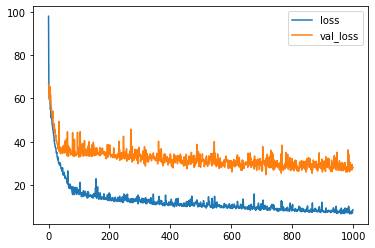

In [25]:
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
# plt.plot(result.epoch, result.history['mae'], label='mae')
# plt.plot(result.epoch, result.history['val_mae'], label='val_mae')
plt.legend(['loss', 'val_loss'])  # 'mae','val_mae'
plt.show()

#### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 matrics에서 설정한 항목값

In [26]:
eRet=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 28.2011 - mae: 3.3444


In [27]:
eRet

[28.2010555267334, 3.344439744949341]

#### [2-5] 예측
---
- predict()

In [28]:
model.predict(X_train[:1])

1/1 [==============================] - 0s 81ms/step


array([[18.128601]], dtype=float32)

In [36]:
model1=Sequential( [Dense(10, activation='relu', input_shape=(3,)),
                    Dense(5, activation='relu'),
                    Dense(1, activation='sigmoid')])

In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
